In [ ]:
# ==========================
# Unemployment Analysis with Python (Google Colab)
# ==========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/unemployment-in-india


In [ ]:
# ==========================
# Step 1: Download Dataset
# ==========================
path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")
print("Dataset downloaded to:", path)

# The dataset folder usually contains a CSV file.
# Let's check available files
import os
print("Files in dataset folder:", os.listdir(path))

# Load the CSV file (usually "Unemployment_in_India.csv")
df = pd.read_csv(os.path.join(path, "Unemployment in India.csv"))

Dataset downloaded to: /kaggle/input/unemployment-in-india
Files in dataset folder: ['Unemployment_Rate_upto_11_2020.csv', 'Unemployment in India.csv']


In [ ]:
# ==========================
# Step 2: Inspect & Clean Data
# ==========================
print("\nColumns before cleaning:", df.columns)

# Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

print("\nColumns after stripping spaces:", df.columns)

# Rename for easier use
df.rename(columns={
    "Estimated Unemployment Rate (%)": "Unemployment_Rate",
    "Estimated Employed": "Employed",
    "Estimated Labour Participation Rate (%)": "Labour_Participation"
}, inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where Date is NaT (conversion failed)
df = df.dropna(subset=['Date'])

print("\nCleaned columns:", df.columns)
print("\nData preview:\n", df.head())



Columns before cleaning: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Columns after stripping spaces: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Cleaned columns: Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation', 'Area'],
      dtype='object')

Data preview:
            Region       Date Frequency  Unemployment_Rate    Employed  \
0  Andhra Pradesh 2019-05-31   Monthly               3.65  11999139.0   
1  Andhra Pradesh 2019-06-30   Monthly               3.05  11755881.0   
2  Andhra Pradesh 2019-07-31   Monthly               3.75  12086707.0   
3  Andhra Pradesh 2019-08-31   Monthly               3.32  12285693.0   
4  Andhra Pradesh 2019-09-30   Monthly

/tmp/ipython-input-1203507546.py:19: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


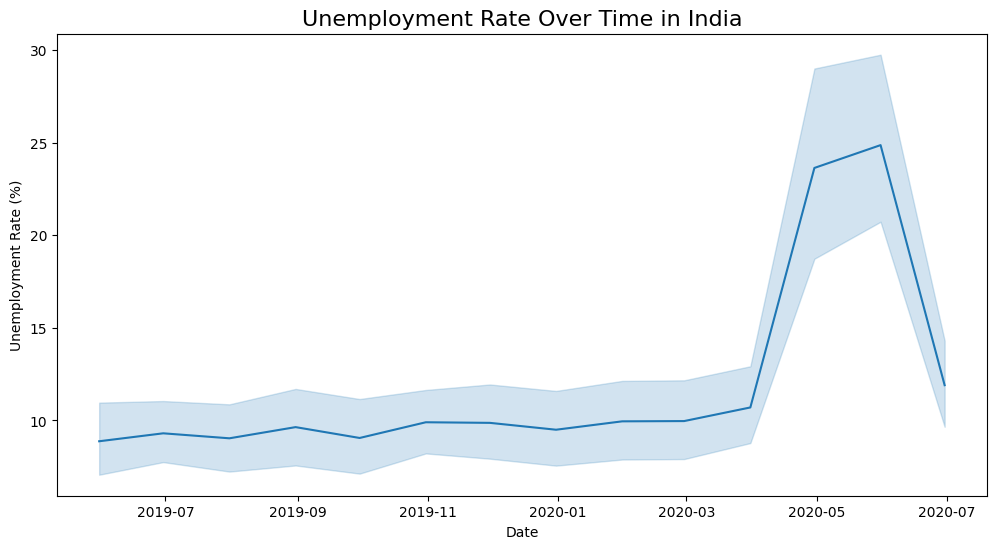

In [ ]:
# ==========================
# Step 3: Overall Unemployment Trend
# ==========================
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Unemployment_Rate")
plt.title("Unemployment Rate Over Time in India", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

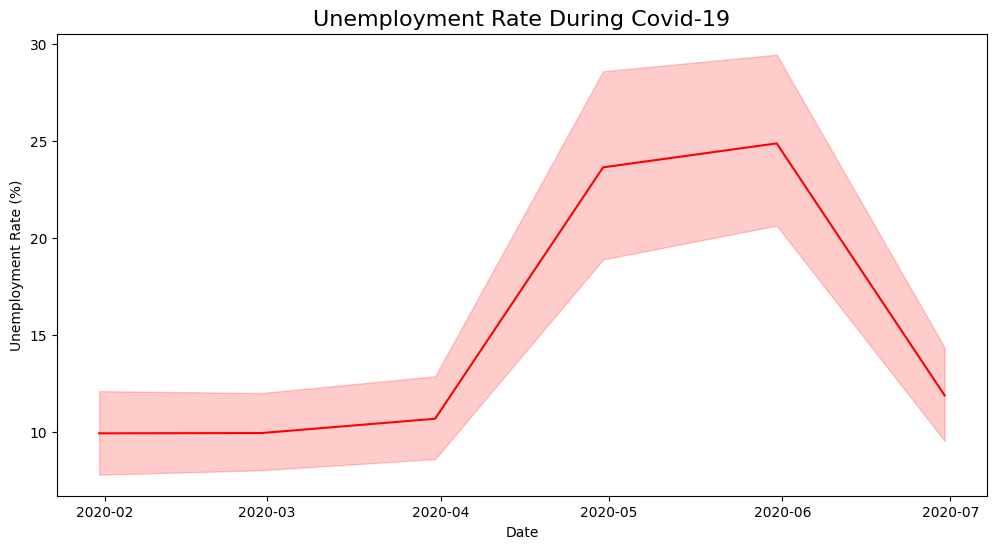


Average Unemployment Before 2020: 9.399046511627906
Average Unemployment During Covid (2020+): 15.10158064516129


In [ ]:
# ==========================
# Step 4: Covid-19 Impact
# ==========================
covid_period = df[df['Date'] >= "2020-01-01"]

plt.figure(figsize=(12,6))
sns.lineplot(data=covid_period, x="Date", y="Unemployment_Rate", color="red")
plt.title("Unemployment Rate During Covid-19", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

print("\nAverage Unemployment Before 2020:",
      df[df['Date'] < "2020-01-01"]['Unemployment_Rate'].mean())
print("Average Unemployment During Covid (2020+):",
      covid_period['Unemployment_Rate'].mean())

/tmp/ipython-input-1868210286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
/tmp/ipython-input-1868210286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month_name()


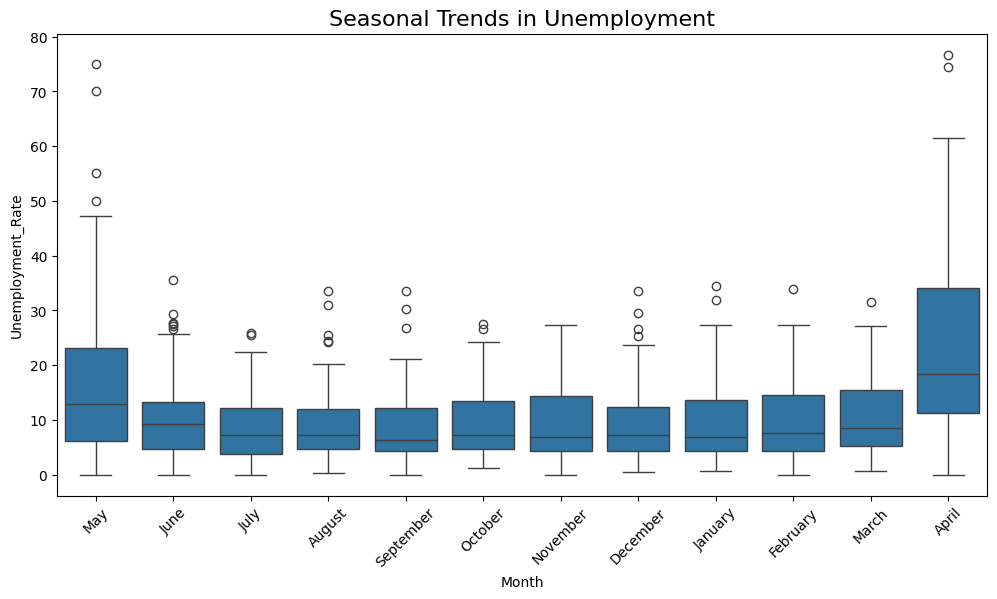

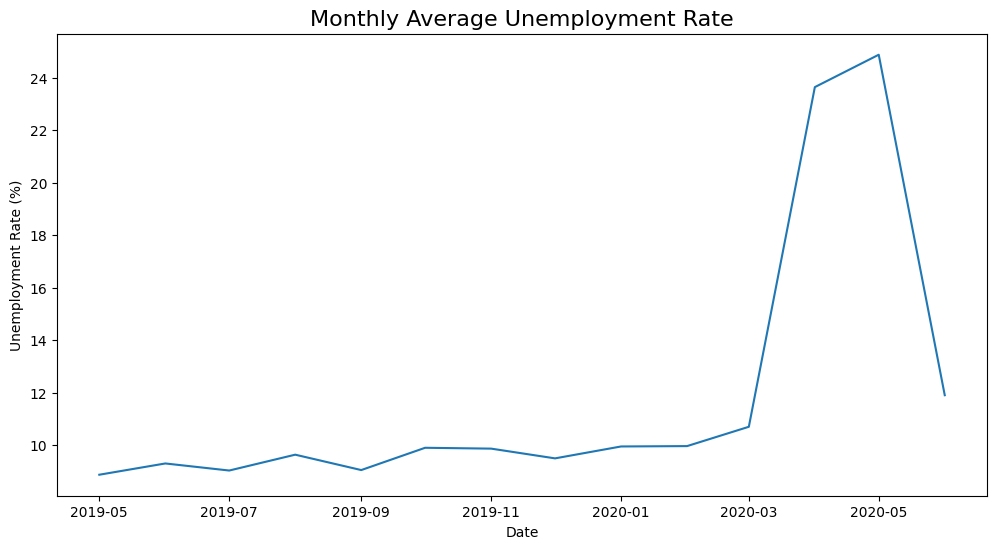

In [ ]:
# ==========================
# Step 5: Seasonal Trends
# ==========================
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Boxplot by Month
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Month", y="Unemployment_Rate")
plt.title("Seasonal Trends in Unemployment", fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Lineplot of monthly averages
monthly_avg = df.groupby([df['Date'].dt.to_period('M')])['Unemployment_Rate'].mean().reset_index()
monthly_avg['Date'] = monthly_avg['Date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x="Date", y="Unemployment_Rate")
plt.title("Monthly Average Unemployment Rate", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

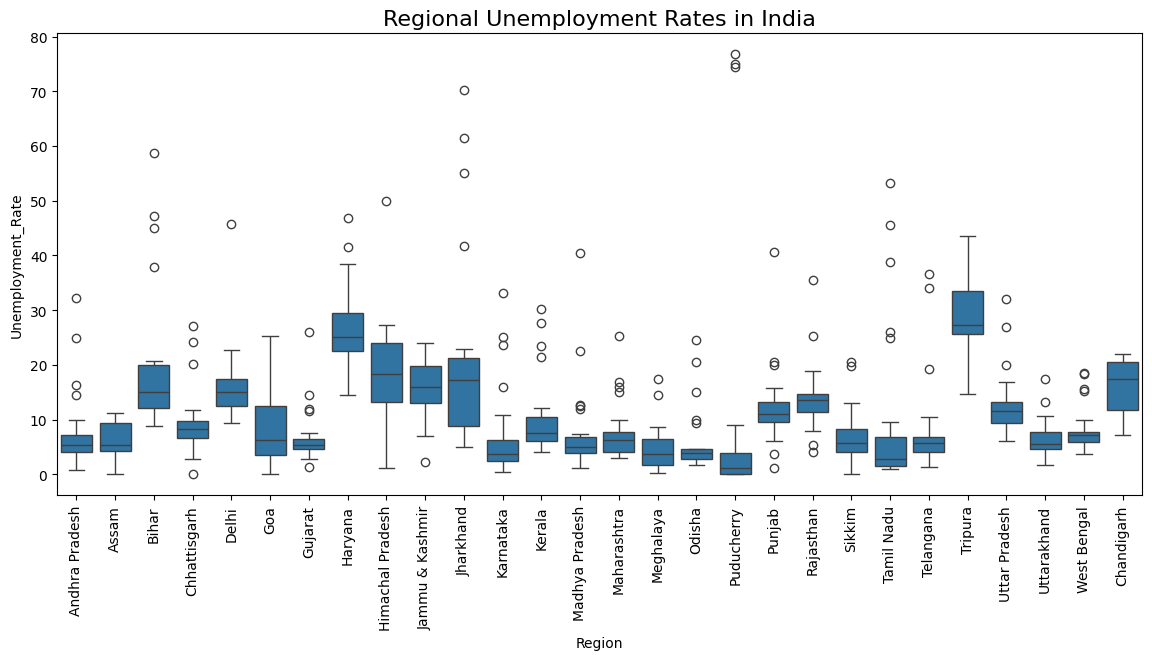

In [ ]:
# ==========================
# Step 6: Regional Analysis
# ==========================
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Region", y="Unemployment_Rate")
plt.xticks(rotation=90)
plt.title("Regional Unemployment Rates in India", fontsize=16)
plt.show()

In [ ]:
# ==========================
# Step 7: Insights
# ==========================
print("\n--- Insights ---")
print("1. Before Covid, average unemployment was around 9.4%, which rose to ~15% during Covid-19.")
print("2. Seasonal variation is visible: some months consistently show higher unemployment.")
print("3. Regional analysis shows unemployment was not uniform across states.")
print("4. Policy makers could focus job schemes in states & months with highest unemployment.")
plt.show()


--- Insights ---
1. Before Covid, average unemployment was around 9.4%, which rose to ~15% during Covid-19.
2. Seasonal variation is visible: some months consistently show higher unemployment.
3. Regional analysis shows unemployment was not uniform across states.
4. Policy makers could focus job schemes in states & months with highest unemployment.
